# Chapter10 언어 모델을 위한 신경망

#### 10-1 어텐션 메커니즘과 트랜스포머

#### 순환 신경망을 사용한 인코더-디코더 네트워크

* 순환신경망의 한계
    1) 시퀀스가 길어질수록 이전에 처리한 데이터 기억하기 어려움
    2) 기계 번역에서 한계가 두드러짐 
    3) 번역할 문장이 길어질 수록 기존 RNN 기반 모델은 번역의 품질을 유지하기 어려움: 시퀀스-투-시퀀스 구조(seq-to-seq)
        * 인코더 신경망: 입력된 문장을 단어(토큰) 단위로 하나씩 처리하면서 전체 정보를 하나의 은닉 상태에 압축
        * 디코더 신경망: 이 은닉 상태를 받아 마찬가지로 한 단어씩 번역된 문장 생성
        * 위의 인코더-디코더 구조는 문장이 길어질 수록 초기에 입력된 내용을 기억하기 어려움
        * 디코더 신경망은 인코더의 마지막 은닉 상태만 참고하여 번역을 수행해서 문제가 더 심해짐 
        * 텍스트를 토큰 단위로 처리, 한 토큰씩 받고 출력도 한 토큰씩 -> 속도가 느리다
        * 자기회귀모델(autoregressive model): 디코더는 이전에 생성한 토큰을 참고하면서 다음 토큰 생성

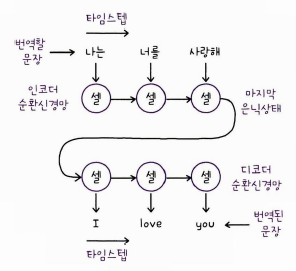

# 어텐션 메커니즘

* 어텐션 메커니즘(attention mechanism): 인코더의 모든 타임스텝에서 계산된 은닉 상태를 활용 
* 어텐션 가중치: 각 은닉 상태마다 가중치를 다르게 적용하여 더 중요한 정보 강조, 다른 모델 파라미터와 마찬가지로 신경망을 훈련하면서 함께 학습 
* 어텐션 메커니즘 장점: 긴 텍스트를 처리할 때 정보 손실을 줄이는데 매우 효과적
* 어텐션 메커니즘 단점
    * 어텐션 가중치를 계산하기 위해 인코더의 모든 타임스텝에서 생성된 은닉 상태를 저장해야함 -> 연산량 증가
    * 인코더가 처리할 수 있는 타임스텝의 최대 개수 정해야함 -> 입력 텍스트의 길이가 제한될 수 있음 
    * 여전히 한 번에 한 토큰씩 처리해야함

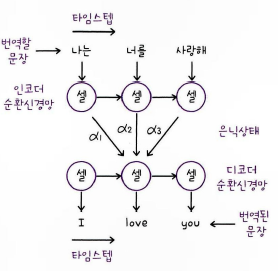

# 트랜스포머 

* 기존의 인코더-디코더 구조 유지하면서 순환 신경망을 완전 제거했음 
* 입력테스트를 한 토큰씩 처리할 필요 없이 한번에 모두 처리

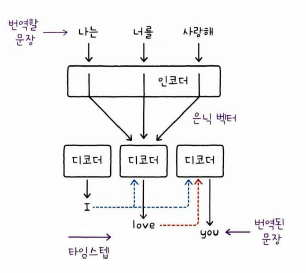


#### 트랜스포머의 작동 방식
* 인코더는 입력된 텍스트를 한번에 모두 처리 -> 기존 신경 순환망의 타임 스텝 개념이 필요하지 않음
* 입력 길이의 제한이 생기긴 했지만 한번에 모두 처리 할 수 있어서 모델의 처리 속도 크게 향상
* 은닉상태라는 개념을 사용하지 않음으로 대신 은닉벡터(hidden vector), 단어벡ㅌ(word vector), 임베딩 벡터(embedding vector)라는 표현을 사용
* 디코더는 인코더에서 받은 임베딩 벡터를 활용해 각 타임스텝에서 출력할 토큰 생성
* 디코더는 이전의 생성된 토큰을 참고하여 새로운 토큰을 생성

# 셀프 어텐션 메커니즘

* 기존 어텐션 메커니즘: 인코더의 은닉 상태와 디코더의 은식 상태를 비교해 디코더가 특정 타임스텝에서 어떤 입력 토큰에 집중해야 하는지 학습
* 셀프 어텐션: 인코더에 입력되는 토큰만으로 어텐션 가중치 학습


#### 셀프 어텐션 계산 과정
1. 입력 텍스트의 각 토큰을 밀집층으로 통과 (전체 토큰이 한번에 밀집층 통과)
2. 밀집층을 통과한 벡터를 쿼리(query) 벡터라고 함
3. 같은 입력 텍스트를 두 번째 밀집층에 통과시켜 키(key) 벡터를 만듬 
--> 쿼리를 생성하는 밀집층과 키를 생성하는 밀집층은 다름

#### 어텐션 점수 계산
1. 쿼리 벡터에 키 벡터가 생성되면 두 벡터를 서로 곱해서 어텐션 점수(attention score) 계산
    ex) 입력 토근 3개 - 쿼리 벡터 3개 - 키 벡터 3개 --> 3*3 : 총 9개의 어텐션 점수 만들어짐 -> 3*3형태의 어텐션 행렬 생성
2. 입력 텍스트를 또 다른 밀집층에 통과시켜 값벡터를 계산: 계산된 어텐션 점수를 값 벡터에 곱해서 최종적인 셀프 어텐션 출력 

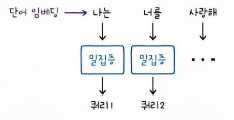 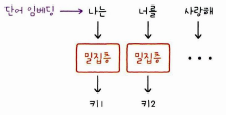 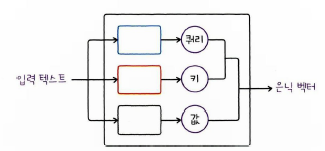


#### 멀티 헤드 어텐션
1. 어텐션 헤드: 셀프 어텐션 연산을 수행하는 하나의 단위 
2. 멀티 헤드 어텐션: 여러개의 어텐션 헤드 사용 -> 각 어텐션 헤드에서는 쿼리, 키, 값 벡터를 생성하는 밀집층이 서로 다르게 사용
3. 어텐션 헤드들의 출력을 하나로 합쳐진 후, 밀집층을 통과하여 어텐션 층의 최종 출력(헤드 개수는 모델마다 다름, 보통 몇 개에서 수십개)

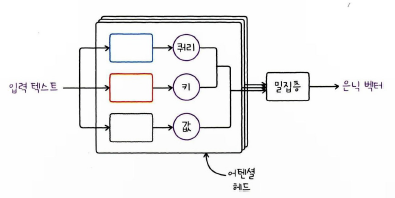

# 층 정규화

* 배치 정규화(Batch Nomrmalization): 주로 합성곱 신경망에 널리 활용되며, 층과 층사이에 놓임. 이전 층의 출력을 배치단위로 평균과 분산을 계산하여 평균이 0, 분산이 1이 되도록 조정한 후, 다음 층으로 전달
* 모든 특성을 동일한 분포(평균0, 분산1)로 정규화 하면 정보 손실 가능성 있음, 이를 방지하기 위해 배치 정규화 층은 평균과 분산의 양을 조정하는 두 개의 파라미터를 학습하여 정규화함

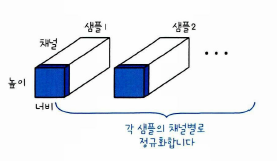

* 합성곱 층이 출력한 특성맵(샘플개수, 높이, 너비 , 채널), 위 그림의 파란색으로 표시된 부분이 정규화가 적용되는 단위: 모든 샘플에서 특정 채널의 데이터를 모아 평균과 분산을 계산한 후 정규화 적용
* 장점: 훈련 속도가 빠르고, 학습 과정이 안정화 -> 모델 성능 향상 
* 층 정규화(layer normalization): 배치 정규화를 텍스트 데이터에 적용하기 어려워 고안됨, 각 샘플의 토큰마다 개별적으로 정규화 수행 -> 샘플마다 길이가 달라도 독립적으로 정규화 

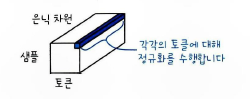

* 원본 트랜스포머 모델의 아키텍쳐

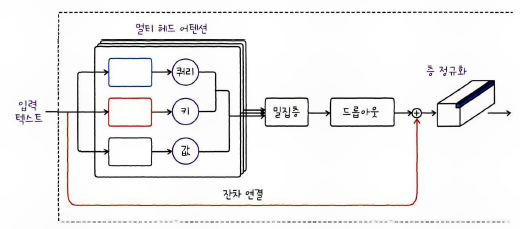

* 잔차연결(residual connection) or 스킵연결(skip connection)
    * 신경망은 층이 많을수록 훈련이 어려워짐 -> 해결하기 위해 잔차 연결 도입
    * 멀티헤드 어텐션 층 거친 출력 + 입력값 (잔차연결을 통해) 더해짐
    * 신경망이 훈련될때 뒤에서부터 거꾸로 모델의 파라미터 업데이트 신호가 전파 -> 잔차연결이 추가되면 이 신호가 바로 앞쪽 층으로 전달 -> 신경망 층을 많이 쌓아도 효과적으로 훈련가능

# 피드포워드 네트워크와 인코더 블록

* 피드포워드 네트워크(feedforward network): 트랜스포머의 인코더에서 멀티헤드어텐션과 층 정규화 다음에 나오는 밀집층
    * 보통 두개이 밀집층으로 구성
    * 첫번째 층: ReLU 활성화 함수 사용
    * 두번째 층: 활성화 함수 사용 x 
    * 드롭아웃 층이 추가되고, 이 세개의 층을 또 다른 잔차 연결이 생성

    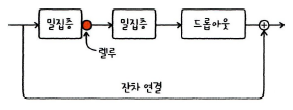

    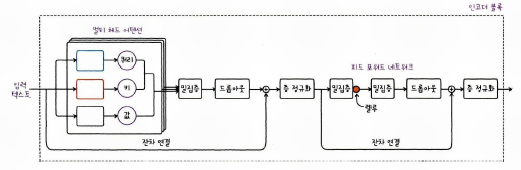

    * 동일한 인코딩 블록을 여러개 반복해서 배치할 수 있음(입력하는 벡터의 차원과 출력하는 벡터의 차원이 동일함으로)
    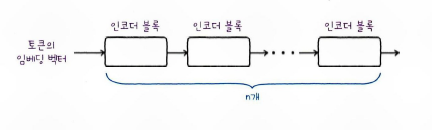

# 토큰 임베딩과 위치 인코딩

#### 토큰 임베딩
* 트랜스포머에선 토큰간의 관계는 반영되지만 위치는 따로 고려되지 않음, but 단어는 위치에 따라 의미가 달라질 수 있음 --> 위치 정보 추가: 위치 임베딩

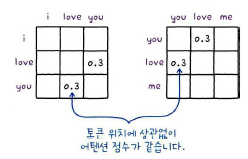

#### 위치 임베딩
* 위치 인코딩(positional encoding): 사인 함수와 코사인 함수를 사용해 토큰의 위치에 따라 변하는 벡터 생성, 여기에 단어 임베딩 더함 

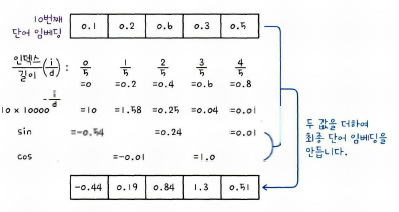

*  10 * 10000에서 10이 해당 토큰의 순서임, 즉 위치 값이 들어감
* 사인과 코사인 함수는 일정한 주기로 값을 반복하기 때문에, 위치 인코딩도 자연스럽게 주기적 패턴을 가짐
* 위치 인코딩 = 절대 인코딩 : 토큰의 위치와 임베딩 벡터의 차원데 따라 일정한 값으로 계산 

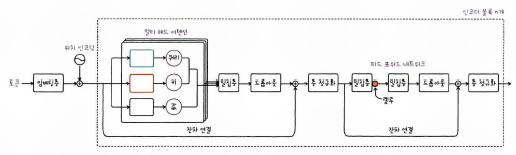

# 디코더 블록

* 크로스어텐션: 인코더가 출력한 임베딩 벡터를 입력으로 받는 멀티 헤드 어텐션 층이 있음. 디코더에서 받은 벡터를 쿼리로 사용하고, 인코더의 출력을 키와 값으로 사용
* 디코더 블록의 아키텍쳐

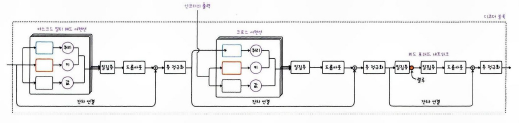

* 디코더 블록도 여러개 존재

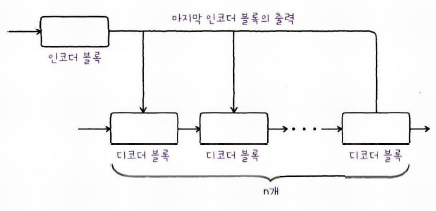

* 인코더와 차이점
    * 디코더는 자기회귀 모델 방식에 따라 한 번에 하나의 토큰만 생성 

    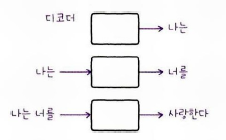 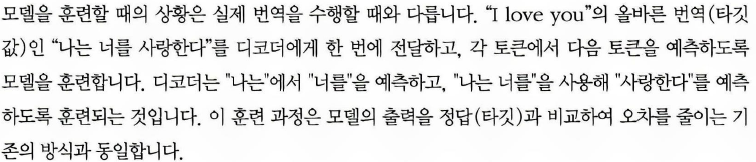


* 마스킹 처리: 디코더가 한 타임스텝에서 어텐션 점수를 계산할 때 현재 토큰까지만 참고하고, 이후의 토큰을 볼 수 없게 제한
    * 디코더의 첫 번째 멀티 헤드 어텐션 층을 마스크드 멀티 헤드 어텐션(masked multi-head attention)층이라 부름

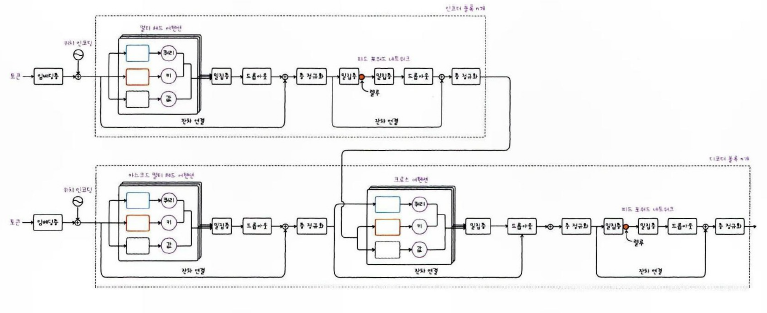